
##                     AMES HOUSE SALEPRICE PREDICTION MACHINE LEARNING MULTI LINEAR MODEL


## Problem Statement

Based on the AMES housing sales price data, we have to create a model to predict the sales price. The prediction can help the general public and real estate agents, who are looking to buy or sell houses. This model will help the customer in predicting the saleprice.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Reading the csv file as pandas dataframe
df = pd.read_csv('C:\\Users\\abinl\\Desktop\\DSI_Work_Area\\classes-master\\Project1234\\project_2\\datasets\\train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
# sets the maximum viewable column to 999
pd.set_option('display.max_columns',999)

## DATA EXPLORATION

In [4]:
# Changing column name to lower case and inserting _ for space.
df.columns = [x.lower().replace(' ','_') for x in df.columns]

In [5]:
# finding null values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

In [6]:
# Setting the datatype to String
df['id']=df['id'].astype('str')
df['pid']=df['pid'].astype('str')
df['ms_subclass']=df['ms_subclass'].astype('str')



In [7]:
# finding the null values in each column

null_values=df.isnull().sum().to_frame('nulls')
null_values[null_values['nulls']>0]

,nulls
lot_frontage,330
alley,1911
mas_vnr_type,22
mas_vnr_area,22
bsmt_qual,55
bsmt_cond,55
bsmt_exposure,58
bsmtfin_type_1,55
bsmtfin_sf_1,1
bsmtfin_type_2,56


In [8]:
df[df['garage_area'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [9]:
# null value at garage area and garage car is replaced to 0 as some home maynot have a car.
df.loc[1712,'garage_area']=0
df.loc[1712,'garage_cars']=0

In [10]:
# Missing value in lot frontage is changed to median as all home will have a lot frontage.

df['lot_frontage'].fillna(df['lot_frontage'].median(),inplace = True)


In [11]:
# Some home may not have basement, So it is changed to 0.
df[df['total_bsmt_sf'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [12]:
df.loc[1327,'total_bsmt_sf']=0


In [13]:
# Statistical datas of each colums are investigated
df_desc=df.describe().T

In [14]:
# added this lines to get an idea about outliers
df_desc['mean-3std']=df_desc['mean']-3*df_desc['std']
df_desc['mean+3std']=df_desc['mean']+3*df_desc['std']
df_desc

,count,mean,std,min,25%,50%,75%,max,mean-3std,mean+3std
lot_frontage,2051.0,68.885422,21.309886,21.0,60.0,68.0,78.00,313.0,4.955763,132.815081
lot_area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.50,159000.0,-10162.258537,30292.674920
overall_qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.00,10.0,1.833329,10.390952
overall_cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.00,9.0,2.248673,8.875657
year_built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.00,2010.0,1881.175255,2062.242590
year_remod/add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.00,2010.0,1921.081400,2047.298902
mas_vnr_area,2029.0,99.695909,174.963129,0.0,0.0,0.0,161.00,1600.0,-425.193476,624.585295
bsmtfin_sf_1,2050.0,442.300488,461.204124,0.0,0.0,368.0,733.75,5644.0,-941.311884,1825.912860
bsmtfin_sf_2,2050.0,47.959024,165.000901,0.0,0.0,0.0,0.00,1474.0,-447.043680,542.961729
bsmt_unf_sf,2050.0,567.728293,444.954786,0.0,220.0,474.5,811.00,2336.0,-767.136064,1902.592649


In [15]:
# Identified the outlier in garage year built to be a data entry error and change it from 2207 to 2007.
df[df['garage_yr_blt']==2207.0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


In [16]:
df.loc[1699,'garage_yr_blt']=2007.0

In [17]:
#Removed the gr_liv_area above 4000
df[df['gr_liv_area']>4000]


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [18]:
df.drop([960,1885],axis=0,inplace=True)

In [19]:
df[df['gr_liv_area']>4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [20]:
# Some home may not have mas_vnr_area, so changed it to 0.
df['mas_vnr_area'].fillna(0,inplace = True)


In [21]:
# Dummies created for nominal data columns
df=pd.get_dummies(df,columns=['ms_subclass','ms_zoning','street','alley','land_contour','lot_config','neighborhood','condition_1','condition_2','bldg_type','house_style','roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','heating','central_air','garage_type','misc_feature','sale_type'],drop_first=True)
df.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,68.0,13517,IR1,AllPub,Gtl,6,8,1976,2005,289.0,Gd,TA,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,Ex,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,0,3,2010,130500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.0,11492,IR1,AllPub,Gtl,7,5,1996,1997,132.0,Gd,TA,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0

In [22]:
# Ordinal variables are changed with numerical values.
df['lot_shape']=df['lot_shape'].map({'IR1':1,'IR2':2,'IR3':3,'Reg':4})    
df['utilities']=df['utilities'].map({'AllPub':4,'NoSewr':3, 'NoSeWa':2,'ELO':1})
df['land_slope']=df['land_slope'].map({'Gtl':1,'Mod':2,'Sev':3}) 
df['electrical']=df['electrical'].map({'SBrkr':1,'FuseA':2,'FuseF':3,'FuseP':4,'Mix':5}) 
df['garage_finish']=df['garage_finish'].map({'Fin':3,'RFn':2,'Unf':1,np.nan:0})
df['paved_drive']=df['paved_drive'].map({'Y':3, 'P':2,'N':1})
df['fence']=df['fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,np.nan:0})
df['bsmt_exposure']=df['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,np.nan:0})
df['functional']=df['functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,
                                       'Sal':1})

In [23]:
dict1 = {'Ex':5,'Gd':4, 'TA':3,'Fa':2,'Po':1,np.nan:0}
for col1 in ['exter_qual', 'exter_cond', 'bsmt_qual','bsmt_cond','heating_qc','kitchen_qual',
             'fireplace_qu','garage_qual','garage_cond','pool_qc' ]:
    df[col1] = df[col1].map(dict1)    

In [24]:
dict2 = {'GLQ':6, 'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,np.nan:0}  
for col2 in ['bsmtfin_type_1','bsmtfin_type_2']:
    df[col2] = df[col2].map(dict2)

In [25]:
df.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,68.0,13517,1,4,1,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,1,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,0,3,2010,130500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.0,11492,1,4,1,7,5,1996,1997,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,5,1,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,1

In [26]:
# Some of the house doesn't have a garage and so garage year built is changed to 0
df['garage_yr_blt'].fillna(0,inplace = True)


In [27]:
df[df['bsmt_full_bath'].isnull()]

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
616,1498,908154080,123.0,47007,1,4,1,5,7,1959,1996,0.0,3,3,0,0,0,0,0.0,0,0.0,0.0,0.0,3,1,3820,0,0,3820,NaN,NaN,3,1,5,1,5,11,8,2,4,1959.0,1,2.0,624.0,3,3,3,0,372,0,0,0,0,0,0,0,7,2008,284700,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1327,1342,903230120,99.0,5940,1,4,1,4,7,1946,1950,0.0,3,3,0,0,0,0,NaN,0,NaN,NaN,0.0,3,2,896,0,0,896,NaN,NaN,1,0,2,1,3,4,8,0,0,1946.0,1,1.0,

##### The above 2 rows 616 and 1327 does not have basement. So we can convert the Nan values into 0.

In [28]:
df['bsmt_full_bath'].fillna(0,inplace = True)
df['bsmt_half_bath'].fillna(0,inplace = True)
df['bsmt_unf_sf'].fillna(0,inplace = True)
df['bsmtfin_sf_2'].fillna(0,inplace = True)
df['bsmtfin_sf_1'].fillna(0,inplace = True)

In [29]:
null_values=df.isnull().sum().to_frame('nulls')
null_values[null_values['nulls']>0]

,nulls


In [30]:
df.corr()['saleprice'].sort_values()



mas_vnr_type_None      -0.424540
garage_type_Detchd     -0.370485
foundation_CBlock      -0.355768
lot_shape              -0.299875
ms_zoning_RM           -0.282032
roof_style_Gable       -0.250019
ms_subclass_30         -0.248572
electrical             -0.247890
sale_type_WD           -0.213536
neighborhood_OldTown   -0.208418
exterior_1st_Wd Sdng   -0.191799
neighborhood_NAmes     -0.189456
neighborhood_IDOTRR    -0.189266
ms_subclass_50         -0.182388
neighborhood_Edwards   -0.176848
exterior_2nd_Wd Sdng   -0.173032
fence                  -0.159136
exterior_1st_MetalSd   -0.149919
exterior_2nd_MetalSd   -0.139405
enclosed_porch         -0.135713
neighborhood_BrkSide   -0.134818
neighborhood_Sawyer    -0.133726
ms_zoning_C (all)      -0.126267
kitchen_abvgr          -0.125472
foundation_Slab        -0.119070
ms_subclass_160        -0.114973
exterior_1st_HdBoard   -0.114392
condition_1_Feedr      -0.114290
bldg_type_Twnhs        -0.113921
neighborhood_MeadowV   -0.111573
          

lets consider the independant variable with correlation above + or - 0.4 for our model.
As there are not many negative correlation, We could consider the top 3, which is 'mas_vnr_type_None','garage_type_Detchd' and 'foundation_CBlock'. So that the model will have slight balance between the positive and negative correlation. df_train is a dataframe with selected features.

In [31]:
# created new dataframe df_train with the chosen features
df_train=df.reindex(columns=['id','pid','full_bath','mas_vnr_type_None','lot_frontage','wood_deck_sf','fireplaces','2nd_flr_sf',
                   'heating_qc','neighborhood_NridgHt','bsmt_exposure','totrms_abvgrd','mas_vnr_area',
                   'fireplace_qu','year_remod/add','garage_finish','year_built','bsmt_qual','1st_flr_sf',
                   'garage_area','total_bsmt_sf','kitchen_qual','exter_qual','gr_liv_area','overall_qual','saleprice'])
                    
df_train.head()

,id,pid,full_bath,mas_vnr_type_None,lot_frontage,wood_deck_sf,fireplaces,2nd_flr_sf,heating_qc,neighborhood_NridgHt,bsmt_exposure,totrms_abvgrd,mas_vnr_area,fireplace_qu,year_remod/add,garage_finish,year_built,bsmt_qual,1st_flr_sf,garage_area,total_bsmt_sf,kitchen_qual,exter_qual,gr_liv_area,overall_qual,saleprice
0,109,533352170,2,0,68.0,0,0,754,5,0,1,6,289.0,0,2005,2,1976,3,725,475.0,725.0,4,4,1479,6,130500
1,544,531379050,2,0,43.0,0,1,1209,5,0,1,8,132.0,3,1997,2,1996,4,913,559.0,913.0,4,4,2122,7,220000
2,153,535304180,1,1,68.0,0,0,0,3,0,1,5,0.0,0,2007,1,1953,3,1057,246.0,1057.0,4,3,1057,5,109000
3,318,916386060,2,1,73.0,100,0,700,4,0,1,7,0.0,0,2007,3,2006,4,744,400.0,384.0,3,3,1444,5,174000
4,255,906425045,2,1,82.0,0,0,614,3,0,1,6,0.0,0,1993,1,1900,2,831,484.0,676.0,3,3,1445,6,138500


In [32]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 26 columns):
id                      2049 non-null object
pid                     2049 non-null object
full_bath               2049 non-null int64
mas_vnr_type_None       2049 non-null uint8
lot_frontage            2049 non-null float64
wood_deck_sf            2049 non-null int64
fireplaces              2049 non-null int64
2nd_flr_sf              2049 non-null int64
heating_qc              2049 non-null int64
neighborhood_NridgHt    2049 non-null uint8
bsmt_exposure           2049 non-null int64
totrms_abvgrd           2049 non-null int64
mas_vnr_area            2049 non-null float64
fireplace_qu            2049 non-null int64
year_remod/add          2049 non-null int64
garage_finish           2049 non-null int64
year_built              2049 non-null int64
bsmt_qual               2049 non-null int64
1st_flr_sf              2049 non-null int64
garage_area             2049 non-null float64
total

##### The info() about the df_train has mixed datatypes. Except ID and PID all other features are converted into float.

In [33]:

col_float=['full_bath','mas_vnr_type_None','lot_frontage','wood_deck_sf','fireplaces','heating_qc','neighborhood_NridgHt',
           'bsmt_exposure','totrms_abvgrd','fireplaces','year_remod/add','garage_finish',
           'year_built','bsmt_qual','1st_flr_sf','kitchen_qual','exter_qual','gr_liv_area','overall_qual','saleprice']
for col in col_float:
    df_train[col]=df_train[col].astype(float)

In [34]:
# ordering the columns
df_train=df.reindex(columns=['id','pid','full_bath','mas_vnr_type_None','lot_frontage','wood_deck_sf','fireplaces','2nd_flr_sf',
                   'heating_qc','neighborhood_NridgHt','bsmt_exposure','totrms_abvgrd','mas_vnr_area',
                   'fireplace_qu','year_remod/add','garage_finish','year_built','bsmt_qual','1st_flr_sf',
                   'garage_area','total_bsmt_sf','kitchen_qual','exter_qual','gr_liv_area','overall_qual','saleprice'])
df_train.head()

,id,pid,full_bath,mas_vnr_type_None,lot_frontage,wood_deck_sf,fireplaces,2nd_flr_sf,heating_qc,neighborhood_NridgHt,bsmt_exposure,totrms_abvgrd,mas_vnr_area,fireplace_qu,year_remod/add,garage_finish,year_built,bsmt_qual,1st_flr_sf,garage_area,total_bsmt_sf,kitchen_qual,exter_qual,gr_liv_area,overall_qual,saleprice
0,109,533352170,2,0,68.0,0,0,754,5,0,1,6,289.0,0,2005,2,1976,3,725,475.0,725.0,4,4,1479,6,130500
1,544,531379050,2,0,43.0,0,1,1209,5,0,1,8,132.0,3,1997,2,1996,4,913,559.0,913.0,4,4,2122,7,220000
2,153,535304180,1,1,68.0,0,0,0,3,0,1,5,0.0,0,2007,1,1953,3,1057,246.0,1057.0,4,3,1057,5,109000
3,318,916386060,2,1,73.0,100,0,700,4,0,1,7,0.0,0,2007,3,2006,4,744,400.0,384.0,3,3,1444,5,174000
4,255,906425045,2,1,82.0,0,0,614,3,0,1,6,0.0,0,1993,1,1900,2,831,484.0,676.0,3,3,1445,6,138500


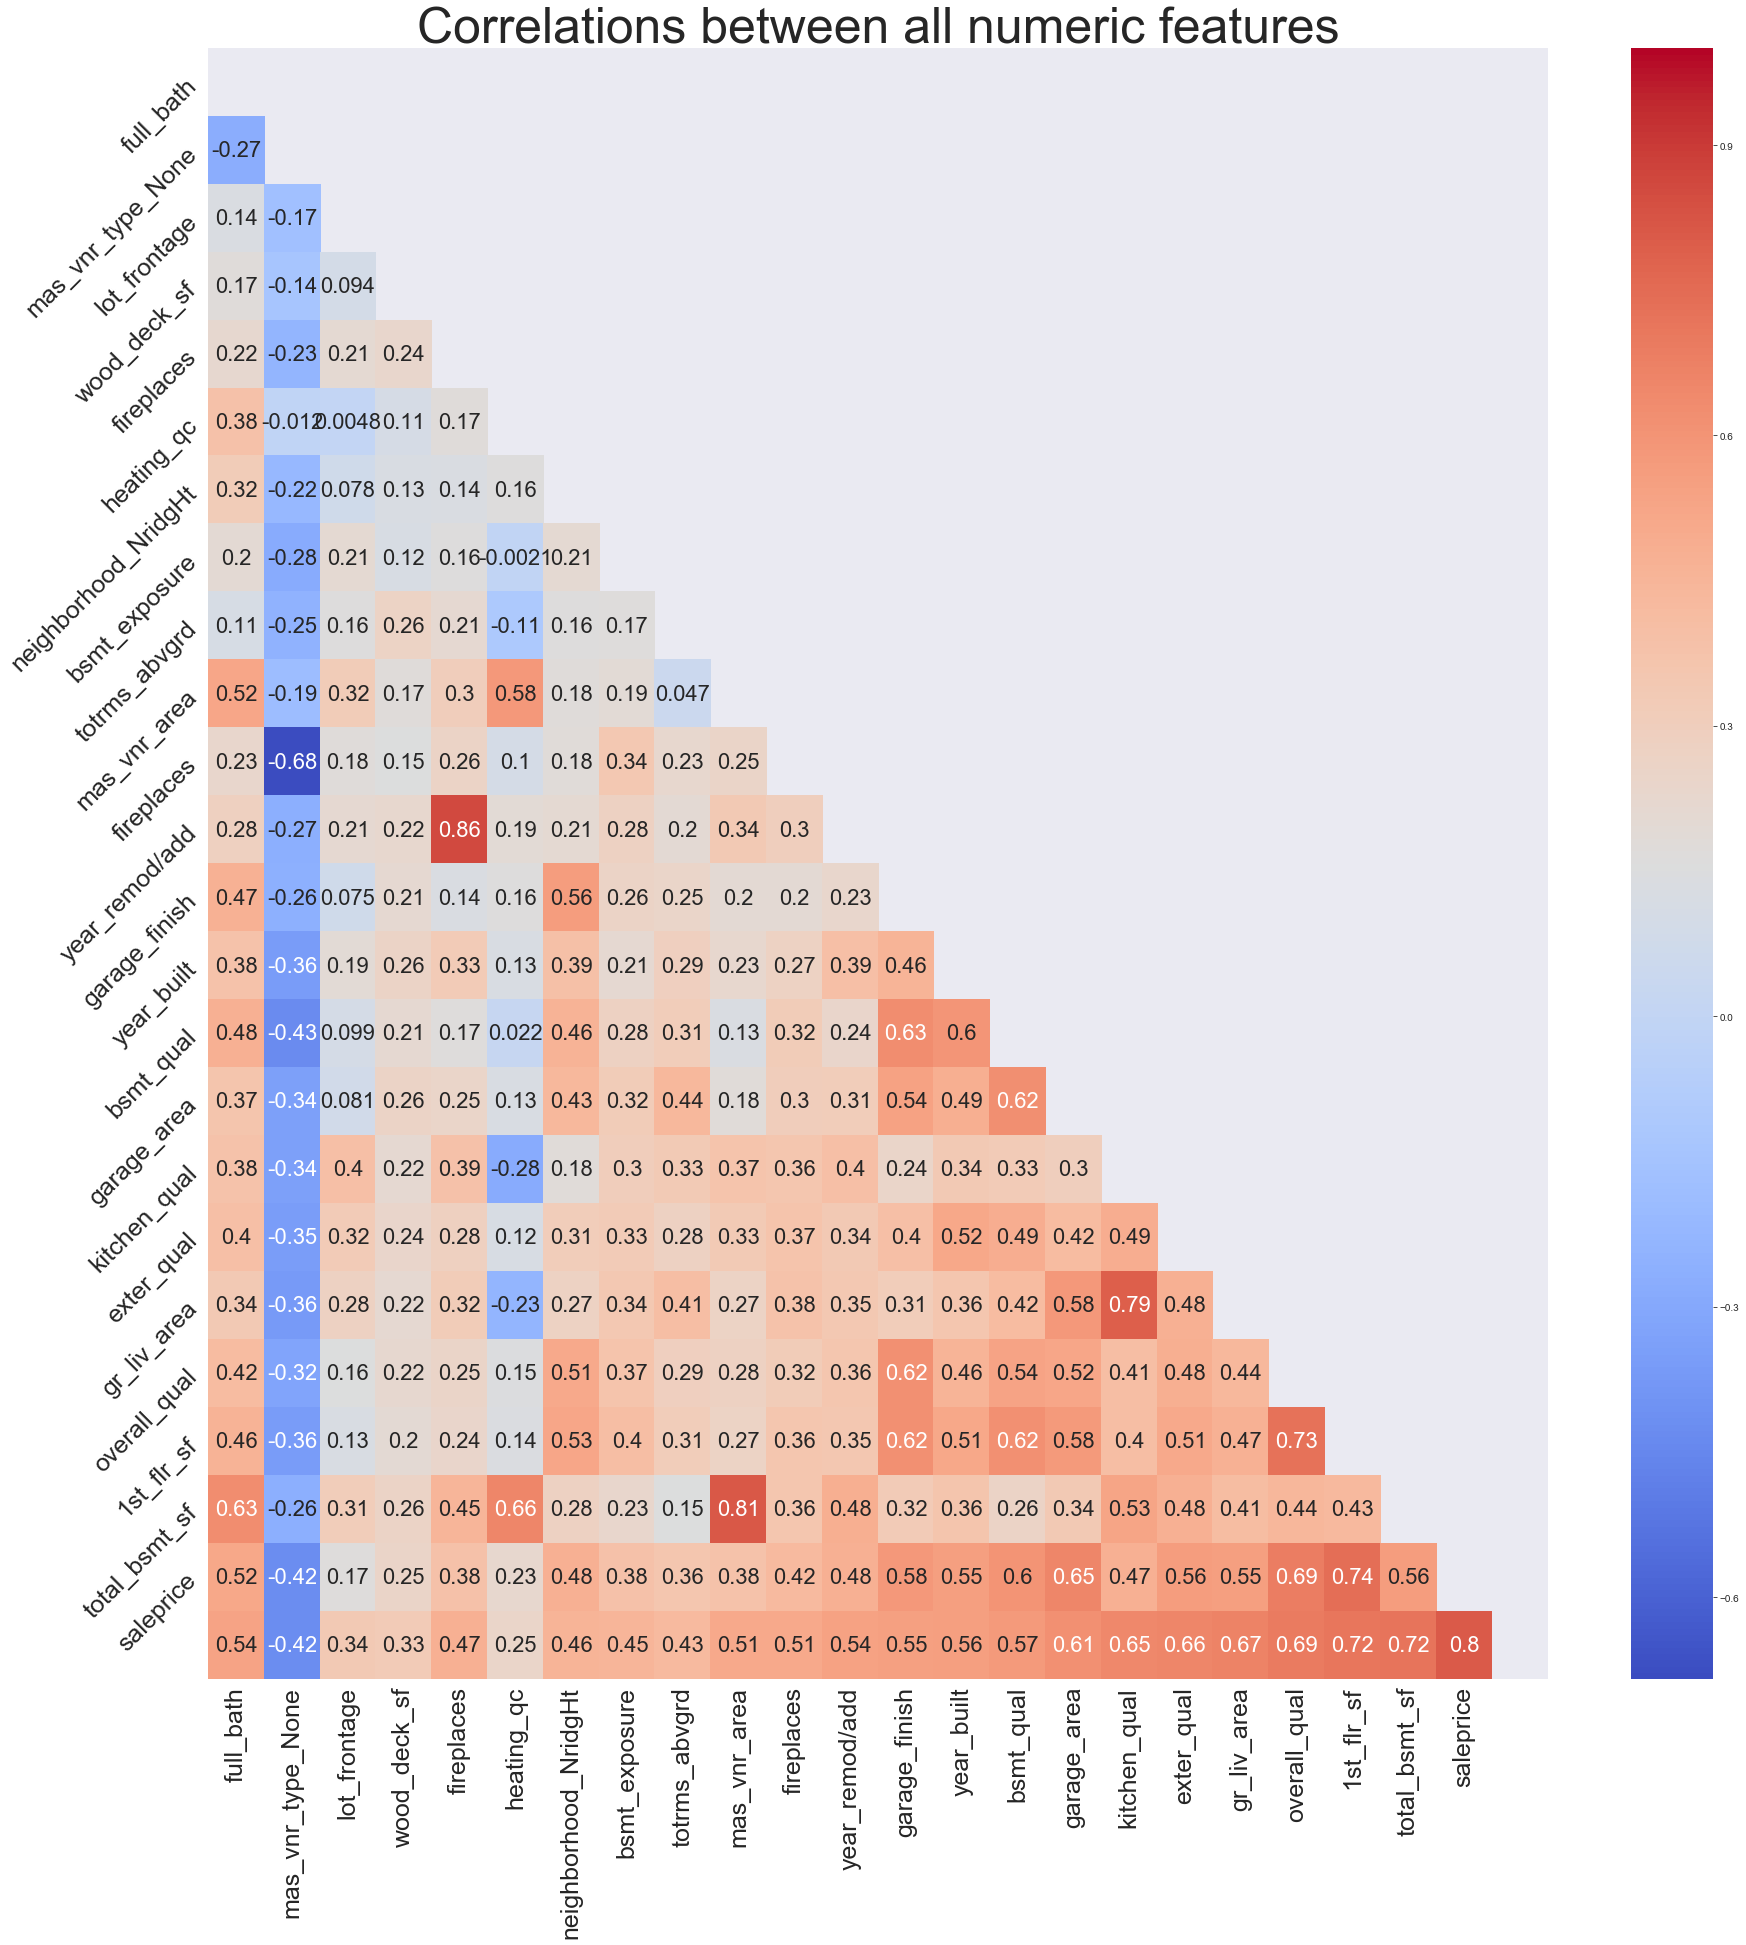

In [35]:
# Heatmap to look into the correlation between selected features
corr = df_train.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
labels=['full_bath','mas_vnr_type_None','lot_frontage','wood_deck_sf','fireplaces','heating_qc','neighborhood_NridgHt',
        'bsmt_exposure','totrms_abvgrd','mas_vnr_area','fireplaces','year_remod/add',
        'garage_finish','year_built','bsmt_qual','garage_area','kitchen_qual','exter_qual','gr_liv_area','overall_qual',
        '1st_flr_sf','total_bsmt_sf','saleprice']
plt.subplots(figsize=(30,30))
ax = plt.axes()
sns.heatmap(corr,mask=mask,annot = True,annot_kws={'size':22},cmap="coolwarm",ax=ax)
ax.set_xticklabels(labels,size = 25)
ax.set_yticklabels(labels,size = 25,rotation=45)
ax.set_title('Correlations between all numeric features', size = 50)
plt.savefig("heatmap.png")

##### As 1st_flr_sf and total_bsmt_sf are correlated highly. I have created a polynomial feature.

In [36]:
df_train['1st_flr_sf + total_bsmt_sf'] = df_train['1st_flr_sf'] + df_train['total_bsmt_sf']

##### gr_liv_area is highly correlated with totrms_abvgrd, fireplace_qu have high correlation with fireplaces. So we can drop fireplaces and totrms_abvgrd which are less correlated with saleprice compared to fireplace_qu and gr_liv_area. As 1st_flr_sf and total_bsmt_sf are well correlated a polynomial is created and they are dropped out.

In [37]:
df_train = df_train.drop(columns=['totrms_abvgrd','fireplace_qu','1st_flr_sf','total_bsmt_sf'])
df_train.head()

,id,pid,full_bath,mas_vnr_type_None,lot_frontage,wood_deck_sf,fireplaces,2nd_flr_sf,heating_qc,neighborhood_NridgHt,bsmt_exposure,mas_vnr_area,year_remod/add,garage_finish,year_built,bsmt_qual,garage_area,kitchen_qual,exter_qual,gr_liv_area,overall_qual,saleprice,1st_flr_sf + total_bsmt_sf
0,109,533352170,2,0,68.0,0,0,754,5,0,1,289.0,2005,2,1976,3,475.0,4,4,1479,6,130500,1450.0
1,544,531379050,2,0,43.0,0,1,1209,5,0,1,132.0,1997,2,1996,4,559.0,4,4,2122,7,220000,1826.0
2,153,535304180,1,1,68.0,0,0,0,3,0,1,0.0,2007,1,1953,3,246.0,4,3,1057,5,109000,2114.0
3,318,916386060,2,1,73.0,100,0,700,4,0,1,0.0,2007,3,2006,4,400.0,3,3,1444,5,174000,1128.0
4,255,906425045,2,1,82.0,0,0,614,3,0,1,0.0,1993,1,1900,2,484.0,3,3,1445,6,138500,1507.0


In [38]:
features=['heating_qc','full_bath','mas_vnr_type_None','lot_frontage','wood_deck_sf','neighborhood_NridgHt','bsmt_exposure',
          'mas_vnr_area','fireplaces','year_remod/add','garage_finish','year_built',
          'bsmt_qual','garage_area','gr_liv_area','exter_qual','kitchen_qual','overall_qual','1st_flr_sf + total_bsmt_sf']

##### Now our features have less correlation with each other but well correlated with saleprice as per multi linear model requirement.

##### Scatter Plots for exploring the features against saleprice

In [39]:
def scatter(predictor_list,target,dataframe,list_of_xaxis,title):
    n = int(np.ceil(len(predictor_list)**0.5))

    fig, ax = plt.subplots(nrows=n,ncols=n,figsize=(25,25))

    ax = ax.ravel()
    for i,item in enumerate (predictor_list):
        ax[i].scatter(dataframe[item], dataframe[target])
        ax[i].set_xlabel(list_of_xaxis[i],fontsize = 15) 
        ax[0].set_title(title, size = 21)  
        for i in range(len(predictor_list),n**2):
            ax[i].axis('off')    
        
        

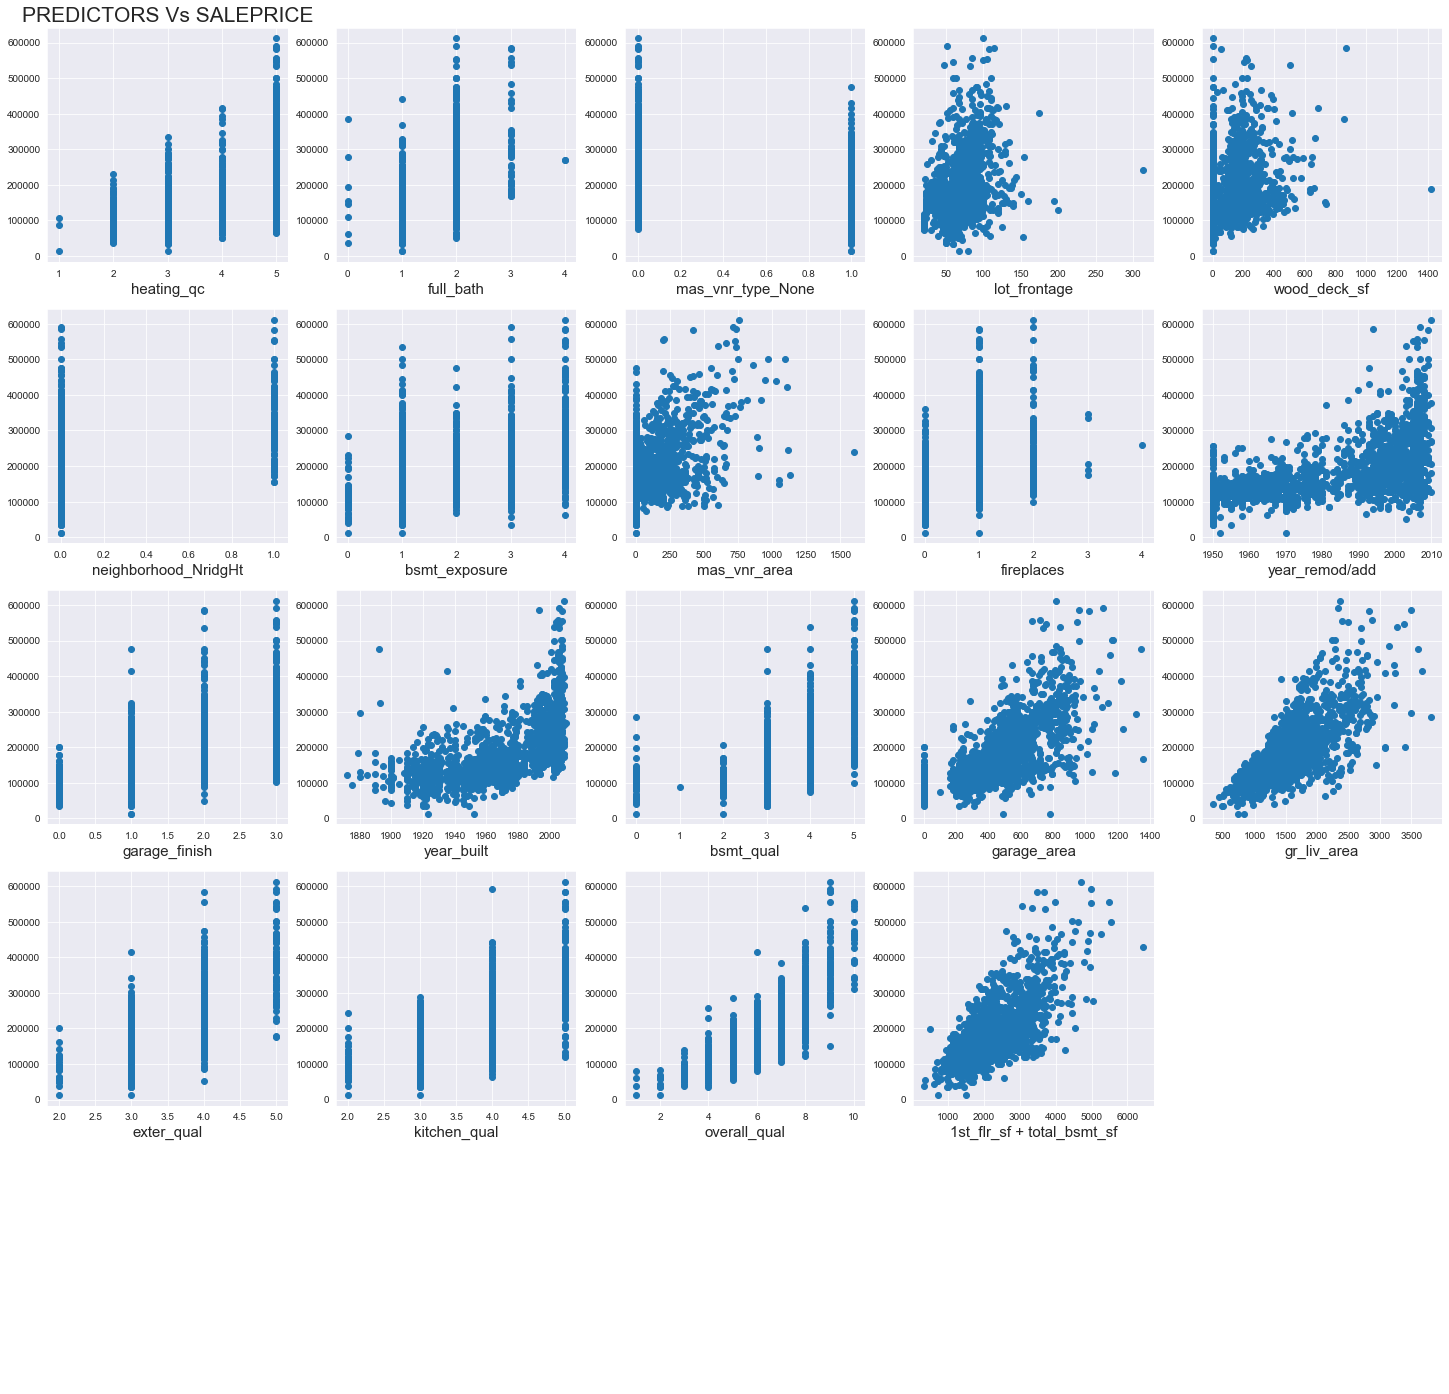

In [40]:
scatter(features,'saleprice',df_train,features,'PREDICTORS Vs SALEPRICE'  )

##### We could see that the features are in a linear relationship either positive or negtive with our target saleprice as per the requirement for multilinear model.

In [41]:
def hist(predictor_list_target,dataframe,list_of_xaxis,title):
    n = int(np.ceil(len(predictor_list_target)**0.5))

    fig, ax = plt.subplots(nrows=n,ncols=n,figsize=(25,25))
    ax = ax.ravel()
    
    for i,item in enumerate (predictor_list_target):
        ax[i].hist(dataframe[item])
        ax[i].set_xlabel(list_of_xaxis[i],fontsize = 15) 
        ax[0].set_title(title, size = 21)  
        for i in range(len(predictor_list_target),n**2):
            ax[i].axis('off')    
        

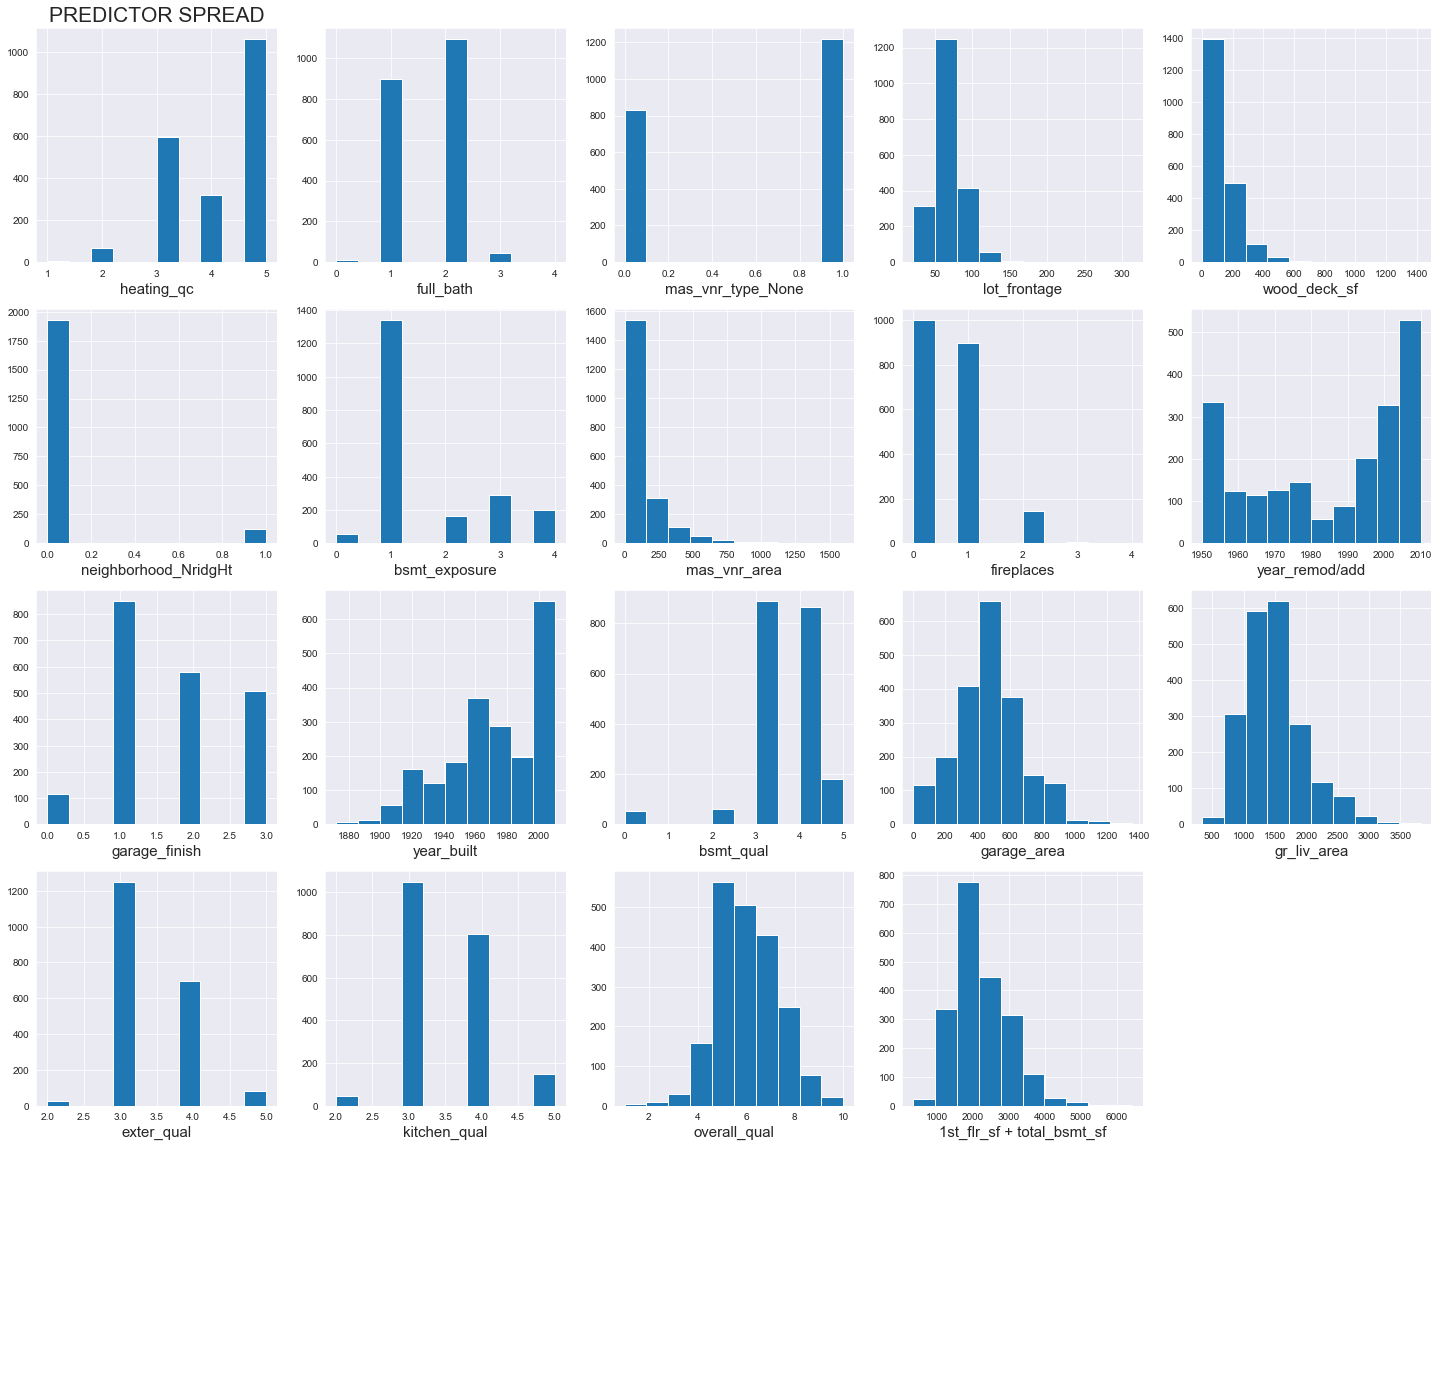

In [42]:
hist(features,df_train,features,'PREDICTOR SPREAD' )
           

##### From the above histogram we could see our features have ups and down and they are not normally distributed. So now we are going to train our model for the above distribution.

Text(0.5, 1.0, 'Saleprice Range')

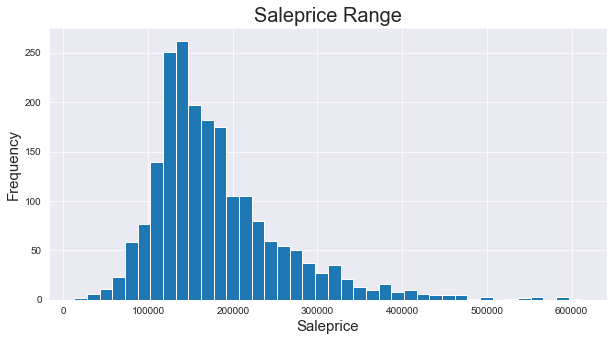

In [43]:
plt.subplots(figsize=(10,5))
plt.hist(df_train['saleprice'],bins=40);
plt.xlabel('Saleprice',fontsize = 15) 
plt.ylabel('Frequency',fontsize = 15) 
plt.title('Saleprice Range', size = 20) 

##### Our X valve is our independant variables stored under features. Y value or our target is saleprice.

In [44]:
X = df_train[features]
y = df_train['saleprice']

# MODEL WITH DATA

##### As per industrial norm the train and test data is split into 75:25%

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

##### We instantiate Linear regression model and try to fit our data.

In [46]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lr.coef_

array([ 2.08387069e+03, -6.25795622e+03,  1.01327160e+04,  1.66390418e+02,
        1.47098385e+01,  2.26261696e+04,  6.74568943e+03,  4.66776870e+01,
        7.56099128e+03,  9.34829409e+01,  1.15630213e+03,  1.95247028e+02,
        2.18187977e+03,  2.40292195e+01,  5.06668414e+01,  1.34361089e+04,
        1.21720276e+04,  1.00007937e+04,  1.54543970e+01])

##### Interpretting the coefficient

In [48]:
pd.DataFrame(lr.coef_,index=features,columns=['Beta_coefficient'])

,Beta_coefficient
heating_qc,2083.870695
full_bath,-6257.956215
mas_vnr_type_None,10132.716003
lot_frontage,166.390418
wood_deck_sf,14.709838
neighborhood_NridgHt,22626.169552
bsmt_exposure,6745.689430
mas_vnr_area,46.677687
fireplaces,7560.991276
year_remod/add,93.482941


##### From the above data frame, we could see some important features like 
* Increase in 1 sq.ft. of area for 1st_flr_sf + total_bsmt_sf increase the sale price by USD 15.45
* If the neighbourhood is NridgHt the price increase by USD 22626.16
* But with increase in full_bath the price show a decrease by -6257.95. While the scatter plot show a positive linear relationship.
* All other variable follows the trend as per our scatter plot between predictors and target.

In [49]:
lr.intercept_

-708506.2165879441

# EXPLORING THE MODEL

In [50]:
# Calculating training error
print('scores=',cross_val_score(lr,X_train,y_train,cv=5))
print('scores=',(cross_val_score(lr,X_train,y_train,cv=5)).mean())


scores= [0.87062112 0.87400199 0.84725918 0.86525153 0.84495684]
scores= 0.8604181309639228


In [51]:
# Function for calculating Root mean square error
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [52]:
# Saleprice prediction
saleprice_pr = lr.predict(X_test)

In [53]:
# rmse for prediction using linear regression model
rmse(saleprice_pr, y_test)

27121.807207147212

Text(0.5, 1.0, 'Test price Vs Predicted price')

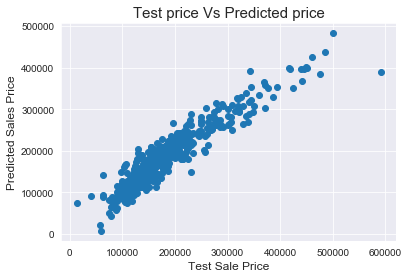

In [54]:

plt.scatter(x=y_test, y=saleprice_pr)
plt.xlabel('Test Sale Price',fontsize = 12) 
plt.ylabel('Predicted Sales Price',fontsize = 12) 
plt.title('Test price Vs Predicted price', size = 15)  

##### The above scatter plot between Predicted Sales price and Test Sale Price show a linear relation with some outliers.

Text(0.5, 1.0, 'Residual Histogram')

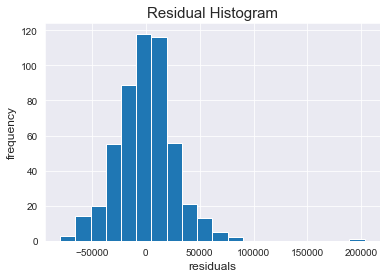

In [55]:

residuals = y_test - saleprice_pr
plt.hist(residuals,bins=20);
plt.xlabel('residuals',fontsize = 12) 
plt.ylabel('frequency',fontsize = 12) 
plt.title('Residual Histogram', size = 15) 

##### The residual plot shows a normal distribution. This shows about 120 observation show a 0 residual and the residual goes down from there. But there is a outlier with residual of about 200000. This might be due to outliers in our data.

Text(0.5, 1.0, 'Predicted price Vs Residual')

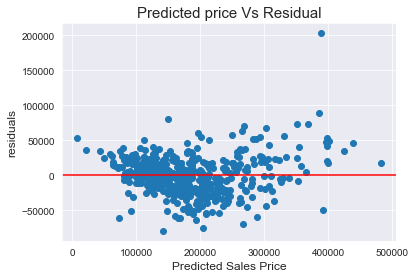

In [56]:
plt.scatter(x=saleprice_pr, y=residuals)
plt.axhline(0, color='r')
plt.xlabel('Predicted Sales Price',fontsize = 12) 
plt.ylabel('residuals',fontsize = 12) 
plt.title('Predicted price Vs Residual', size = 15)  

###### The above scatter plot shows relationship between residual and predicted sales price. The residual spread around the zero line. But again there is one outlier.

## STANDARDISATION

In [57]:
# Initialize the StandardScaler object
ss = StandardScaler()

# use the .fit_transform function to standardize the X_train and .transform to standardize the X_test
X_train_ss = ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

## RIDGE CROSS VALIDATION


In [58]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train_ss, y_train)

print (optimal_ridge.alpha_)


42.97004704320842


In [59]:

print (optimal_ridge.intercept_)

181486.2018229167


In [60]:
pd.DataFrame(optimal_ridge.coef_,index=features,columns=['optimal_ridge.coef_'])

,optimal_ridge.coef_
heating_qc,2100.722640
full_bath,-2378.836341
mas_vnr_type_None,4415.195096
lot_frontage,3604.476775
wood_deck_sf,2045.375377
neighborhood_NridgHt,5329.718705
bsmt_exposure,7100.349813
mas_vnr_area,7686.739565
fireplaces,5052.960255
year_remod/add,2032.824049


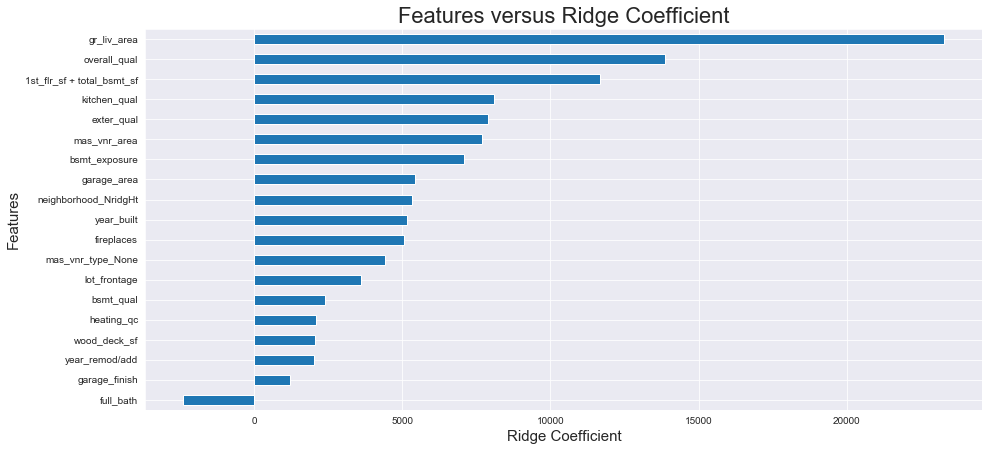

In [61]:
plot=pd.Series(optimal_ridge.coef_,index=features).sort_values().plot.barh(figsize=(15,7))
plt.ylabel('Features',fontsize = 15) 
plt.xlabel('Ridge Coefficient',fontsize = 15) 
plt.title('Features versus Ridge Coefficient', size = 22)
#plot.set_yticklabels(size = 12)
plt.savefig("RidgeCoeff.png")

In [62]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
print(ridge_scores)
print(ridge_scores.mean())

[0.8709754  0.87380258 0.8494383  0.863319   0.84631854]
0.860770762737501


In [63]:
Ridge_pred = optimal_ridge.predict(X_test_ss)

In [64]:
rmse(Ridge_pred, y_test)

27087.945437995382

Text(0.5, 1.0, 'Test price Vs Predicted price')

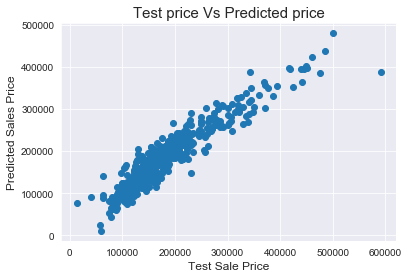

In [65]:
plt.scatter(x=y_test, y=Ridge_pred)
plt.xlabel('Test Sale Price',fontsize = 12) 
plt.ylabel('Predicted Sales Price',fontsize = 12) 
plt.title('Test price Vs Predicted price', size = 15)  

Text(0.5, 1.0, 'Ridge Residual Histogram')

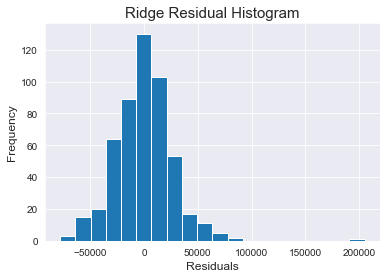

In [66]:
residuals_r = y_test - Ridge_pred
plt.hist(residuals_r,bins=20);
plt.xlabel('Residuals',fontsize = 12) 
plt.ylabel('Frequency',fontsize = 12) 
plt.title('Ridge Residual Histogram', size = 15) 

The normality of the Ridge residuals is similar to the linear model.

Text(0.5, 1.0, 'Ridge Predicted price Vs Residual')

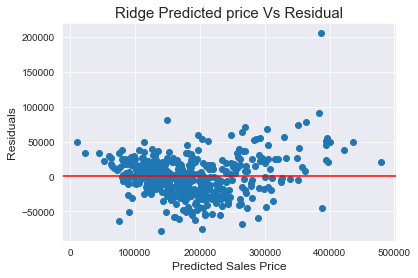

In [67]:
plt.scatter(x=Ridge_pred, y=residuals_r)
plt.axhline(0, color='r')
plt.xlabel('Predicted Sales Price',fontsize = 12) 
plt.ylabel('Residuals',fontsize = 12) 
plt.title('Ridge Predicted price Vs Residual', size = 15)  

###### The above plot is similar to the linear model shows less variance for smaller value of sales.While the variance is higher and most of the points are above line which shows the predicted price is lower than the actual sales for sales more than USD 350000

##### The RMSE for the ridge is 27087.94 which is lower than the linear regression model 27121.80. So, Ridge model is better.

## LASSO CROSS VALIDATION

In [68]:
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(X_train_ss, y_train,)

print (optimal_lasso.alpha_)


63.41934232018882


In [69]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=9)
print(lasso_scores)
print(lasso_scores.mean())

[0.86952065 0.86819342 0.8756693  0.82528355 0.86225077 0.87977608
 0.85967131 0.86586768 0.84314403]
0.8610418670733434


In [70]:
lasso_pred = optimal_lasso.predict(X_test_ss)

In [71]:
pd.DataFrame(optimal_lasso.coef_,index=features,columns=['optimal_lasso.coef_'])

,optimal_lasso.coef_
heating_qc,1986.579698
full_bath,-3198.191626
mas_vnr_type_None,4708.956183
lot_frontage,3399.842020
wood_deck_sf,1867.439416
neighborhood_NridgHt,5387.138550
bsmt_exposure,7292.005253
mas_vnr_area,7755.360384
fireplaces,4735.647310
year_remod/add,1905.047642


In [72]:
rmse(lasso_pred, y_test)

27141.063870123886

##### The RMSE for the lasso is 27140.55 which is higher than the linear regression model 27121.80 and also the RMSE for the ridge which is 27587.94.

## ELASTIC NET VALIDATION


In [73]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
optimal_enet.fit(X_train_ss, y_train)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

63.41934232018882
1.0


In [74]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[0.87064235 0.86489093 0.86368158 0.87999269 0.80804723 0.88363601
 0.87332065 0.86106523 0.86171769 0.8336909 ]
0.8600685269175766


In [75]:
enet_pred = optimal_enet.predict(X_test_ss)

In [76]:
rmse(enet_pred, y_test)

27141.063870123886

###### The RMSE for the elastic net is 27140.55 which is similar to lasso.

# UPLOADING EXPLORING CLEANINNG AND PREDICTING WITH TEST DATA

In [77]:
# uploading the test data 
df1 = pd.read_csv('C:\\Users\\abinl\\Desktop\\DSI_Work_Area\\classes-master\\Project1234\\project_2\\datasets\\test.csv')
df1.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [78]:
# Changing the column name to lower case and with _ instead of space
df1.columns=[x.lower().replace(' ','_') for x in df1.columns]
df1.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [79]:
# Checking the null values
df1.isnull().sum().sort_values(ascending=False).head(20)

pool_qc           875
misc_feature      838
alley             821
fence             707
fireplace_qu      422
lot_frontage      160
garage_cond        45
garage_qual        45
garage_yr_blt      45
garage_finish      45
garage_type        44
bsmt_exposure      25
bsmtfin_type_1     25
bsmt_qual          25
bsmtfin_type_2     25
bsmt_cond          25
mas_vnr_area        1
mas_vnr_type        1
electrical          1
overall_cond        0
dtype: int64

In [80]:
# Changing datatype to string for the following columns
df1['id']=df1['id'].astype('str')
df1['pid']=df1['pid'].astype('str')
df1['ms_subclass']=df1['ms_subclass'].astype('str')

In [81]:
df1_desc= df1.describe().T

In [82]:
# Looking for outliers
df1_desc['mean-3std']=df_desc['mean']-3*df_desc['std']
df1_desc['mean+3std']=df_desc['mean']+3*df_desc['std']
df1_desc

,count,mean,std,min,25%,50%,75%,max,mean-3std,mean+3std
lot_frontage,719.0,69.630042,23.625372,21.0,59.0,68.0,80.0,182.0,4.955763,132.815081
lot_area,879.0,10340.920364,10047.335167,1477.0,7298.5,9453.0,11606.5,215245.0,-10162.258537,30292.674920
overall_qual,879.0,6.054608,1.374756,2.0,5.0,6.0,7.0,10.0,1.833329,10.390952
overall_cond,879.0,5.565415,1.128422,1.0,5.0,5.0,6.0,9.0,2.248673,8.875657
year_built,879.0,1970.533561,30.403527,1880.0,1954.0,1972.0,2000.0,2010.0,1881.175255,2062.242590
year_remod/add,879.0,1984.444824,20.454546,1950.0,1967.0,1992.0,2003.0,2010.0,1921.081400,2047.298902
mas_vnr_area,878.0,106.982916,188.356829,0.0,0.0,0.0,173.5,1378.0,-425.193476,624.585295
bsmtfin_sf_1,879.0,443.397042,442.480223,0.0,0.0,374.0,735.5,2288.0,-941.311884,1825.912860
bsmtfin_sf_2,879.0,53.835040,178.539854,0.0,0.0,0.0,0.0,1526.0,-447.043680,542.961729
bsmt_unf_sf,879.0,539.518771,426.082726,0.0,216.0,453.0,781.5,2046.0,-767.136064,1902.592649


In [83]:
# Get dummies for nominal variables
df1=pd.get_dummies(df1,columns=['ms_subclass','ms_zoning','street','alley','land_contour','lot_config','neighborhood',
                                'condition_1','condition_2','bldg_type','house_style','roof_style','roof_matl','exterior_1st',
                                'exterior_2nd','mas_vnr_type','foundation','heating','central_air','garage_type','misc_feature',
                                'sale_type'],drop_first=True)
df1.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Norm,condition_2_PosA,condition_2_PosN,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,misc_feature_Othr,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,902301120,69.0,9142,Reg,AllPub,Gtl,6,8,1910,1950,0.0,TA,Fa,Fa,TA,No,Unf,0,Unf,0,1020,1020,Gd,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,0,4,2006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,NaN,9662,IR1,AllPub,Gtl,5,4,1977,1977,0.0,TA,TA,Gd,TA,No,Unf,0,Unf,0,1967,1967,TA,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,0,8,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [84]:
# Mapping for ordinal variables
df1['lot_shape']=df1['lot_shape'].map({'IR1':1,'IR2':2,'IR3':3,'Reg':4})    
df1['utilities']=df1['utilities'].map({'AllPub':4,'NoSewr':3, 'NoSeWa':2,'ELO':1})
df1['land_slope']=df1['land_slope'].map({'Gtl':1,'Mod':2,'Sev':3}) 
df1['electrical']=df1['electrical'].map({'SBrkr':1,'FuseA':2,'FuseF':3,'FuseP':4,'Mix':5}) 
df1['functional']=df1['functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
df1['garage_finish']=df1['garage_finish'].map({'Fin':3,'RFn':2,'Unf':1,np.nan:0})
df1['paved_drive']=df1['paved_drive'].map({'Y':3, 'P':2,'N':1})
df1['fence']=df1['fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,np.nan:0})
df1['bsmt_exposure']=df1['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,np.nan:0})

In [85]:
dict1 = {'Ex':5,'Gd':4, 'TA':3,'Fa':2,'Po':1,np.nan:0}
for col1 in ['exter_qual', 'exter_cond', 'bsmt_qual','bsmt_cond','heating_qc','kitchen_qual','fireplace_qu','garage_qual',
             'garage_cond','pool_qc' ]:
    df1[col1] = df1[col1].map(dict1)
   

In [86]:
dict2 = {'GLQ':6, 'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,np.nan:0}  
for col2 in ['bsmtfin_type_1','bsmtfin_type_2']:
    df1[col2] = df1[col2].map(dict2)

In [87]:
df1['1st_flr_sf + total_bsmt_sf']=df1['1st_flr_sf']+df1['total_bsmt_sf']

In [88]:
# forming a test dataframe with features as per our model
df_test=df1.loc[:,['id','pid','full_bath','mas_vnr_type_None','lot_frontage','wood_deck_sf','heating_qc','neighborhood_NridgHt',
                   'bsmt_exposure','mas_vnr_area','fireplaces','year_remod/add',
                   'garage_finish','year_built','bsmt_qual','garage_area','gr_liv_area','exter_qual','kitchen_qual',
                   'overall_qual','1st_flr_sf + total_bsmt_sf']]

In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 21 columns):
id                            879 non-null object
pid                           879 non-null object
full_bath                     879 non-null int64
mas_vnr_type_None             879 non-null uint8
lot_frontage                  719 non-null float64
wood_deck_sf                  879 non-null int64
heating_qc                    879 non-null int64
neighborhood_NridgHt          879 non-null uint8
bsmt_exposure                 879 non-null int64
mas_vnr_area                  878 non-null float64
fireplaces                    879 non-null int64
year_remod/add                879 non-null int64
garage_finish                 879 non-null int64
year_built                    879 non-null int64
bsmt_qual                     879 non-null int64
garage_area                   879 non-null int64
gr_liv_area                   879 non-null int64
exter_qual                    879 non-null int64
kitchen

In [90]:
# Changing the datatype to float for numerical datas
col_float=features
for col in col_float:
    df_test[col]=df_test[col].astype(float)

In [91]:
# Filling up the null value with 0
df_test[df_test['mas_vnr_area'].isnull()]

,id,pid,full_bath,mas_vnr_type_None,lot_frontage,wood_deck_sf,heating_qc,neighborhood_NridgHt,bsmt_exposure,mas_vnr_area,fireplaces,year_remod/add,garage_finish,year_built,bsmt_qual,garage_area,gr_liv_area,exter_qual,kitchen_qual,overall_qual,1st_flr_sf + total_bsmt_sf
866,868,907260030,2.0,0.0,70.0,0.0,5.0,0.0,1.0,NaN,0.0,2002.0,2.0,2002.0,4.0,550.0,1725.0,4.0,4.0,7.0,1680.0


In [92]:
df_test['mas_vnr_area'].fillna(0,inplace = True)

In [93]:
df_test['lot_frontage'].fillna(df_test['lot_frontage'].median(),inplace = True)

In [94]:
# Checking the spread of test data.
def hist(predictor_list_target,dataframe,list_of_xaxis,title):
    n = int(np.ceil(len(predictor_list_target)**0.5))

    fig, ax = plt.subplots(nrows=n,ncols=n,figsize=(25,25))
    ax = ax.ravel()
    
    for i,item in enumerate (predictor_list_target):
        ax[i].hist(dataframe[item])
        ax[i].set_xlabel(list_of_xaxis[i],fontsize = 15) 
        ax[0].set_title(title, size = 21)  
        for i in range(len(predictor_list_target),n**2):
            ax[i].axis('off')    
        

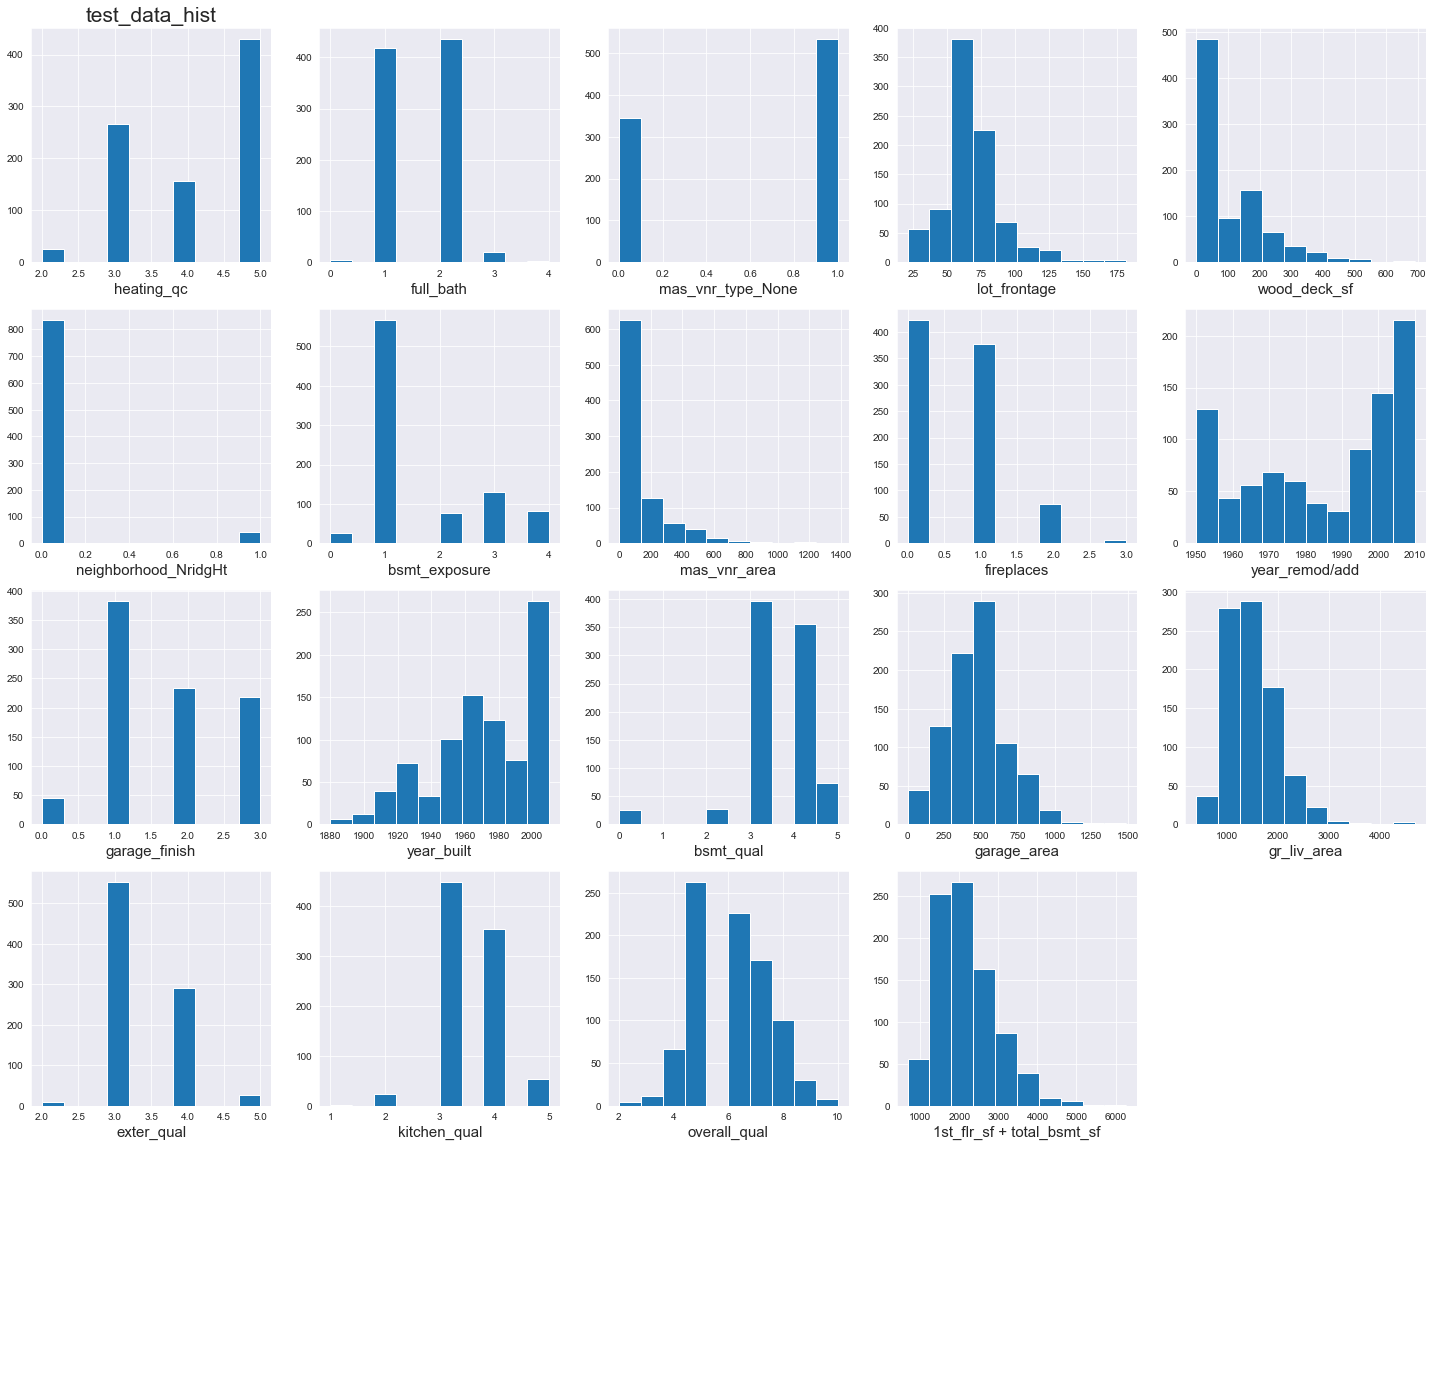

In [95]:
hist(features,df_test,features,'test_data_hist')


##### The above graph illustrate the spread of test data.

In [96]:
# Standardisation and predicting with ridge model
X_test_result=df_test[features]
X_test_result_ss=ss.transform(X_test_result)
Ridge_pred_result = optimal_ridge.predict(X_test_result_ss)

In [97]:
df_test['SalePrice']=Ridge_pred_result

In [98]:
df_test['SalePrice']= round(df_test['SalePrice'],2)


In [99]:
df_result=df_test.loc[:,['id','SalePrice']]

In [100]:
df_result=df_result.set_index(df_result['id'])


In [101]:
df_result.drop(columns='id',inplace = True, axis=1)

In [102]:
df_result.head(5)

,SalePrice
id,
2658,138582.50
2718,199618.98
2414,207312.24
1989,120892.45
625,179736.76


In [103]:
df_result.to_csv('C:\\Users\\abinl\\Desktop\\DSI_Work_Area\\classes-master\\Project1234\\project_2\\datasets\\Predicted_Sales.csv')

# Features and Kaggle Score:
## Case1
##### 'lot_frontage','wood_deck_sf','screen_porch','mas_vnr_type_None','heating_qc','neighborhood_NridgHt','bsmt_exposure',
##### 'mas_vnr_area','foundation_PConc','full_bath','fireplace_qu','year_remod/add','garage_finish','year_built',
##### 'bsmt_qual','garage_area','gr_liv_area','exter_qual','kitchen_qual','overall_qual','1st_flr_sf + total_bsmt_sf'
### Kaggle RMSE - 33211.91569

## Case2
##### 'lot_frontage','wood_deck_sf','screen_porch','mas_vnr_type_None','heating_qc','neighborhood_NridgHt','bsmt_exposure',
##### 'mas_vnr_area','foundation_PConc','full_bath','fireplaces','year_remod/add','garage_finish','year_built',
##### 'bsmt_qual','garage_area','gr_liv_area','exter_qual','kitchen_qual','overall_qual','1st_flr_sf + total_bsmt_sf'
### Kaggle RMSE -32798.31619

## Case3
##### 'mas_vnr_type_None','lot_frontage','wood_deck_sf','screen_porch','heating_qc','neighborhood_NridgHt','bsmt_exposure',
##### 'mas_vnr_area','foundation_PConc','fireplaces','year_remod/add','garage_finish','year_built',
##### 'bsmt_qual','garage_area','gr_liv_area','exter_qual','kitchen_qual','overall_qual','1st_flr_sf + total_bsmt_sf'
###  Kaggle RMSE -33052.04527

## Case4
##### 'mas_vnr_type_None','lot_frontage','wood_deck_sf','screen_porch','heating_qc','neighborhood_NridgHt','bsmt_exposure',
##### 'mas_vnr_area','foundation_PConc','fireplaces','year_remod/add','garage_finish','year_built',
##### 'bsmt_qual','garage_area','gr_liv_area','exter_qual','kitchen_qual','overall_qual','1st_flr_sf + total_bsmt_sf'
### Kaggle RMSE -32190.60509

## Case5 and Finalised one
##### 'mas_vnr_type_None','lot_frontage','wood_deck_sf','screen_porch','heating_qc','neighborhood_NridgHt','bsmt_exposure',
##### 'mas_vnr_area','fireplaces','year_remod/add','garage_finish','year_built',
##### 'bsmt_qual','garage_area','gr_liv_area','exter_qual','kitchen_qual','overall_qual','1st_flr_sf + total_bsmt_sf'
### Kaggle RMSE -32152.31164

# RECOMMENDATION

We have created a multi linear model for our sales price prediction. We have used Ridge regression with RMSE of 27087.94 which is lower than the linear regression model 27121.80. The features that highly affect the sales price includes mas_vnr_type_None','lot_frontage','wood_deck_sf','screen_porch','heating_qc','neighborhood_NridgHt','bsmt_exposure',
'mas_vnr_area','fireplaces','year_remod/add','garage_finish','year_built','bsmt_qual','garage_area','gr_liv_area','exter_qual','kitchen_qual','overall_qual','1st_flr_sf and total_bsmt_sf'. Most of them show a positive relationship, when there is a unit increase in independant variable there is a optimal_ridge.coef_ (Value from the following table) times positive increase in the salesprice. While there is a decrease in sales price with increase in full bath. 

This model works well for sale price until 500000 with Root mean square error of about USD 27087.94 for house at AMES. The predicted saleprice have linear relationship, The Residual histogram follow a normal distribution and the Residual Vs Test Sale price the values are spread around zero line as per our requirement for linear model, But the plot have one outlier which shows it is only trained until sales of USD 500000. 

The model is quite helpful as most of AMES houses are sold at USD 70000 to USD 350000.

In [104]:
pd.DataFrame(optimal_ridge.coef_,index=features,columns=['optimal_ridge.coef_'])

,optimal_ridge.coef_
heating_qc,2100.722640
full_bath,-2378.836341
mas_vnr_type_None,4415.195096
lot_frontage,3604.476775
wood_deck_sf,2045.375377
neighborhood_NridgHt,5329.718705
bsmt_exposure,7100.349813
mas_vnr_area,7686.739565
fireplaces,5052.960255
year_remod/add,2032.824049
